In [1]:
# Scotty from Diversion and Bypass (for 2002)

In [26]:
import arrow
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import statsmodels.api as sm

In [31]:
theodosia_from_diversion_only = 1.429

In [56]:
def read_river_Theodosia():
    part1 = pd.read_csv('river_flows/Theodosia_Scotty_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    part2 = pd.read_csv('river_flows/Theodosia_Bypass_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    part3 = pd.read_csv('river_flows/Theodosia_Diversion_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    for part in [part1, part2, part3]:
        part['date'] = pd.to_datetime(part.drop(columns='flow'))
        part.set_index('date', inplace=True)
        part.drop(columns=['year', 'month', 'day'], inplace=True)
    part1 = part1.rename(columns={'flow': 'Scotty'})
    part2 = part2.rename(columns={'flow': 'Bypass'})
    part3 = part3.rename(columns={'flow': 'Diversion'})
    theodosia = (part3.merge(part2, how='inner', on='date')).merge(part1, how='inner', on='date')
    theodosia['Secondary River Flow'] = theodosia['Scotty'] + theodosia['Diversion'] - theodosia['Bypass']
    part3['FlowFromDiversion'] = part3.Diversion * theodosia_from_diversion_only
    theodosia = theodosia.merge(part3, how='outer', on='date', sort=True)
    theodosia['Secondary River Flow'] = theodosia['Secondary River Flow'].fillna(
        theodosia['FlowFromDiversion'])
    return theodosia

In [18]:
def read_river(river_name, ps):
    river_flow = pd.read_csv(f'river_flows/{river_name}_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    river_flow['date'] = pd.to_datetime(river_flow.drop(columns='flow'))
    river_flow.set_index('date', inplace=True)
    river_flow = river_flow.drop(columns=['year', 'month', 'day'])
    if ps == 'primary':
        river_flow = river_flow.rename(columns={'flow': 'Primary River Flow'})
    elif ps == 'secondary':
        river_flow = river_flow.rename(columns={'flow': 'Secondary River Flow'})
    return river_flow

In [19]:
scotty, bypass, diversion, theodosia = read_river_Theodosia()
englishman = read_river('Englishman', 'primary')

In [23]:
et = theodosia.merge(englishman, how='inner', on='date')

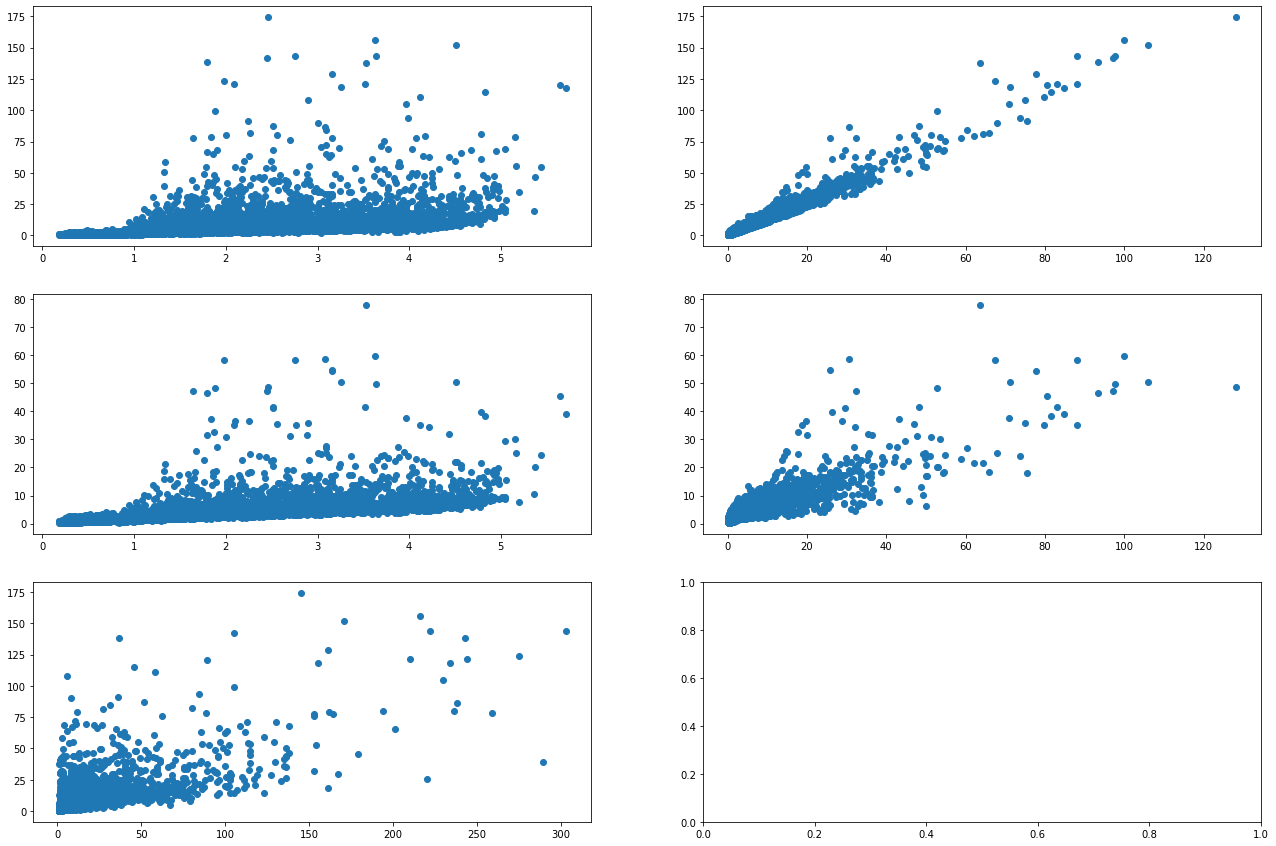

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(22, 15))
axs[0, 0].plot(theodosia.Bypass, theodosia['Secondary River Flow'], 'o');
axs[0, 1].plot(theodosia.Diversion, theodosia['Secondary River Flow'], 'o');
axs[1, 0].plot(theodosia.Bypass, theodosia.Scotty, 'o');
axs[1, 1].plot(theodosia.Diversion, theodosia.Scotty, 'o');
axs[2, 0].plot(et['Primary River Flow'], et['Secondary River Flow'], 'o');

2.4670023167992876
49943.09779269709


Diversion    1.428837
dtype: float64

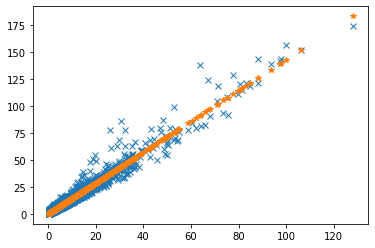

In [27]:
X = theodosia.Diversion
y = theodosia['Secondary River Flow']

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.plot(X, y, 'x')
plt.plot(X, predictions,'*')
# Print out the statistics
print (np.sqrt(((predictions-y)**2).mean()))
print(predictions.sum())
model.params

In [28]:
theodosia

,Scotty,Bypass,Diversion,Secondary River Flow
date,,,,
2003-10-16,7.83,5.20,31.70,34.33
2003-10-17,23.00,4.07,58.90,77.83
2003-10-18,41.60,3.52,83.00,121.08
2003-10-19,14.20,2.65,32.90,44.45
2003-10-20,7.41,2.24,15.10,20.27
...,...,...,...,...
2019-12-27,3.25,1.54,2.73,4.44
2019-12-28,3.13,1.59,2.76,4.30
2019-12-29,3.90,2.37,3.94,5.47


In [30]:
scotty, bypass, diversion, theodosia2 = read_river_Theodosia()
theodosia2

,Diversion,Bypass,Scotty,Secondary River Flow
date,,,,
2003-10-16,31.70,5.20,7.83,34.33
2003-10-17,58.90,4.07,23.00,77.83
2003-10-18,83.00,3.52,41.60,121.08
2003-10-19,32.90,2.65,14.20,44.45
2003-10-20,15.10,2.24,7.41,20.27
...,...,...,...,...
2019-12-27,2.73,1.54,3.25,4.44
2019-12-28,2.76,1.59,3.13,4.30
2019-12-29,3.94,2.37,3.90,5.47


In [42]:
part1, part2, part3, tp = read_river_Theodosia()

In [44]:
part3

,Diversion,Secondary River Flow B
date,,
2000-04-09,5.86,8.37394
2000-04-10,7.26,10.37454
2000-04-11,7.63,10.90327
2000-04-12,8.94,12.77526
2000-04-13,10.90,15.57610
...,...,...
2019-12-27,2.73,3.90117
2019-12-28,2.76,3.94404
2019-12-29,3.94,5.63026


In [45]:
theodosia

,Scotty,Bypass,Diversion,Secondary River Flow
date,,,,
2003-10-16,7.83,5.20,31.70,34.33
2003-10-17,23.00,4.07,58.90,77.83
2003-10-18,41.60,3.52,83.00,121.08
2003-10-19,14.20,2.65,32.90,44.45
2003-10-20,7.41,2.24,15.10,20.27
...,...,...,...,...
2019-12-27,3.25,1.54,2.73,4.44
2019-12-28,3.13,1.59,2.76,4.30
2019-12-29,3.90,2.37,3.94,5.47


In [61]:
tryagain = theodosia.merge(part3, how='outer', on='date', sort=True)

In [62]:
tryagain

,Scotty,Bypass,Diversion_x,Secondary River Flow,Diversion_y,Secondary River Flow B
date,,,,,,
2000-04-09,NaN,NaN,NaN,NaN,5.86,8.37394
2000-04-10,NaN,NaN,NaN,NaN,7.26,10.37454
2000-04-11,NaN,NaN,NaN,NaN,7.63,10.90327
2000-04-12,NaN,NaN,NaN,NaN,8.94,12.77526
2000-04-13,NaN,NaN,NaN,NaN,10.90,15.57610
...,...,...,...,...,...,...
2019-12-27,3.25,1.54,2.73,4.44,2.73,3.90117
2019-12-28,3.13,1.59,2.76,4.30,2.76,3.94404
2019-12-29,3.90,2.37,3.94,5.47,3.94,5.63026


In [63]:
tryagain['Secondary River Flow'] = tryagain['Secondary River Flow'].fillna(
    tryagain['Secondary River Flow B'])

<AxesSubplot:xlabel='date'>

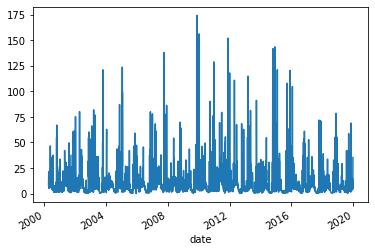

In [64]:
tryagain['Secondary River Flow'].plot()

In [57]:
# Try reworked function
theodosia2 = read_river_Theodosia()

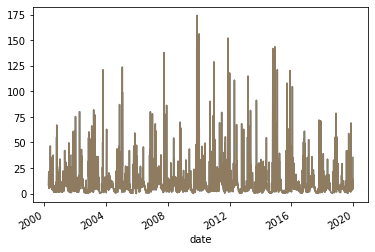

In [65]:
theodosia2['Secondary River Flow'].plot()
tryagain['Secondary River Flow'].plot(alpha=0.5);